In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -U scikit-learn

Enter the name of a score attribute (Q1 to Q9): Q7
Entropy (H): 0.922
Average Entropy (AE) for Q7: 0.815
Information Gain (IG) for Q7: 0.107
Decision Tree Accuracy: 0.630


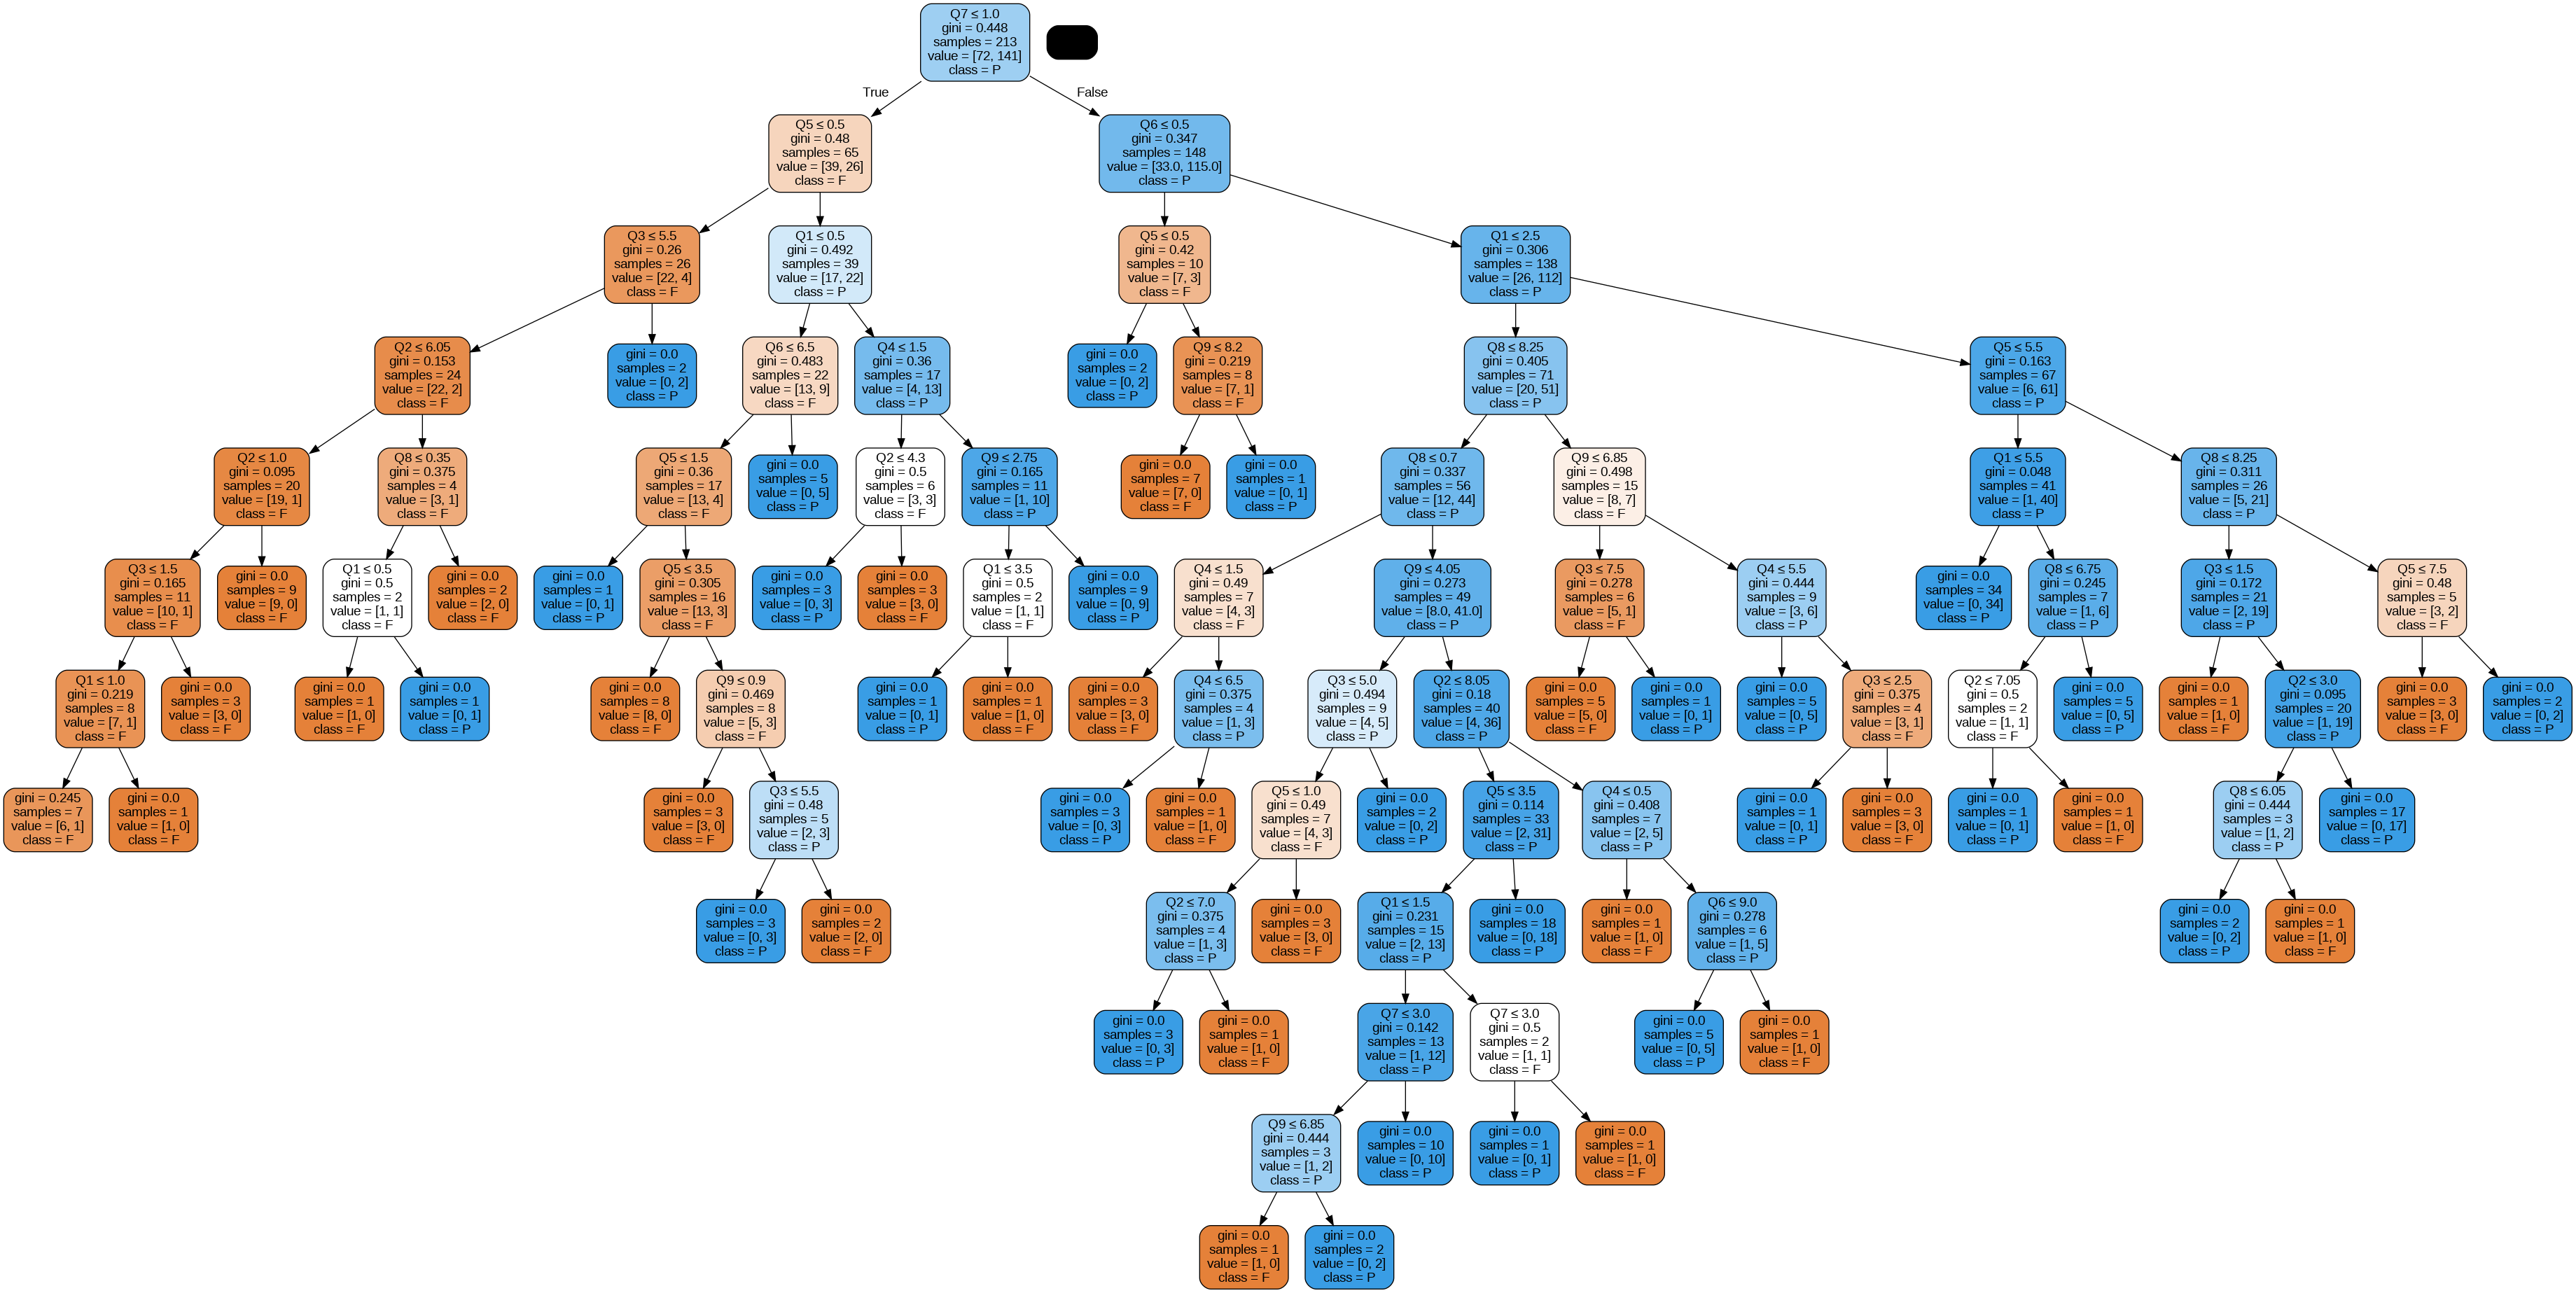

In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from IPython.display import Image

def load_data(file_path):
    return pd.read_csv(file_path)

def calculate_entropy(column):
    value_counts = column.value_counts()
    probabilities = value_counts / len(column)
    entropy = -sum(probabilities * np.log2(probabilities))
    return entropy

def calculate_average_entropy(data, attribute):
    attribute_values = data[attribute].unique()
    average_entropy = 0

    for value in attribute_values:
        subset = data[data[attribute] == value]
        subset_entropy = calculate_entropy(subset['Rank'])
        average_entropy += (len(subset) / len(data)) * subset_entropy

    return average_entropy

def calculate_information_gain(data, attribute):
    entropy_before = calculate_entropy(data['Rank'])
    average_entropy = calculate_average_entropy(data, attribute)
    information_gain = entropy_before - average_entropy
    return information_gain

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Decision Tree Accuracy: {accuracy:.3f}")
    return accuracy

def visualize_decision_tree(model, feature_names, class_names, file_name):
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters=True, feature_names=feature_names,
                    class_names=class_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(file_name)
    return Image(graph.create_png())

def train_decision_tree(X_train, y_train, random_state=42):
    dt_classifier = DecisionTreeClassifier(random_state=random_state)
    dt_classifier.fit(X_train, y_train)
    return dt_classifier

# Load data from the CSV file
data = load_data("/content/drive/MyDrive/Colab_Notebooks/dt_data.csv")
# Prompt user to enter the name of a score attribute (Q1 to Q9)
attribute = input("Enter the name of a score attribute (Q1 to Q9): ")
# Calculate entropy for the entire dataset
entropy = calculate_entropy(data['Rank'])
print(f"Entropy (H): {entropy:.3f}")
# Calculate average entropy for the specified attribute
average_entropy = calculate_average_entropy(data, attribute)
print(f"Average Entropy (AE) for {attribute}: {average_entropy:.3f}")
# Calculate information gain for the specified attribute
information_gain = calculate_information_gain(data, attribute)
print(f"Information Gain (IG) for {attribute}: {information_gain:.3f}")
# Split data into features (X) and target (y)
X = data.iloc[:, 2:]
y = data['Rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_classifier = train_decision_tree(X_train, y_train)
evaluate_model(dt_classifier, X_test, y_test)
visualize_decision_tree(dt_classifier, X.columns, y.unique(), "decision_tree.png")